In [1]:
# load required libraries
import keras
import numpy as np
import matplotlib.pyplot as plt

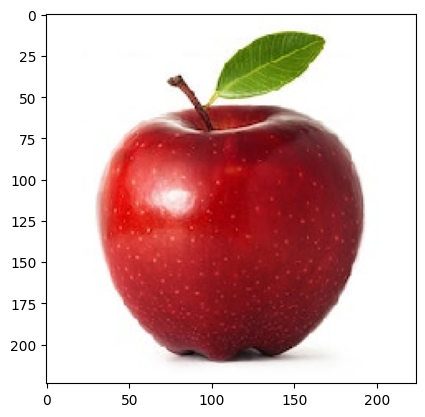

In [82]:
# load sample image file
img_file = "sample-image.jpg"
img = keras.utils.load_img(img_file, target_size=(224,224))
plt.imshow(img)

In [83]:
# convert image to numpy array
img = keras.utils.img_to_array(img)
img.shape

(224, 224, 3)

In [84]:
# load pre-trained model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input

base_model = VGG16(weights='imagenet')

In [100]:
len(base_model.layers)

23

In [86]:
# run prediction only upto some intermediate model layer
model = keras.Model(inputs=base_model.input, outputs=base_model.get_layer('block2_pool').output)

In [87]:
# pass sample image through model
x = preprocess_input(img)
y = model.predict(np.array([x]))
y.shape

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 307ms/step


(1, 56, 56, 128)

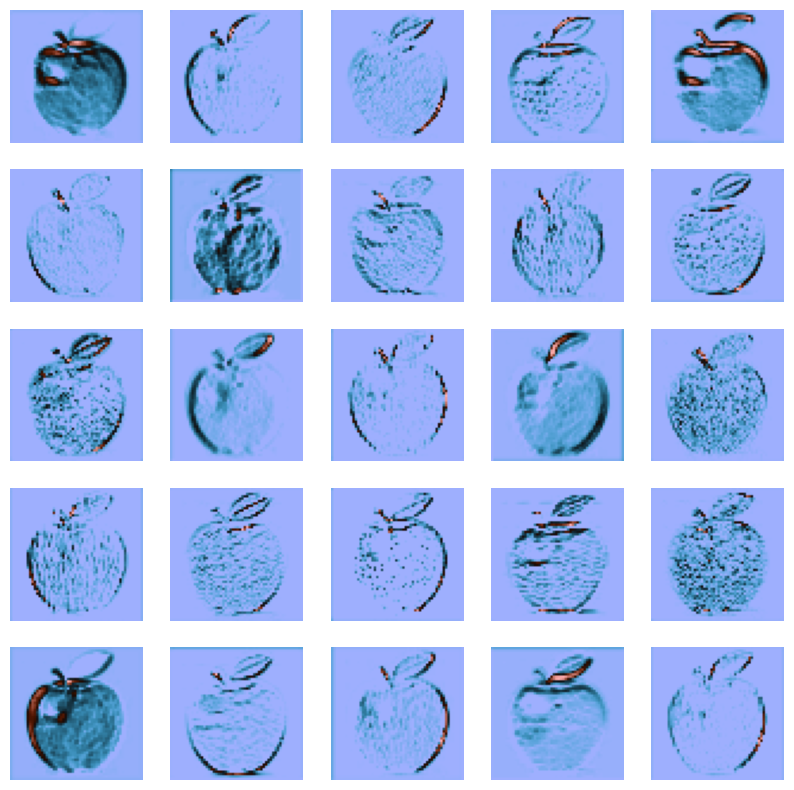

In [99]:
# visualize feature maps

plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.axis('off')
  plt.imshow(y[0,:,:,i], cmap="berlin")

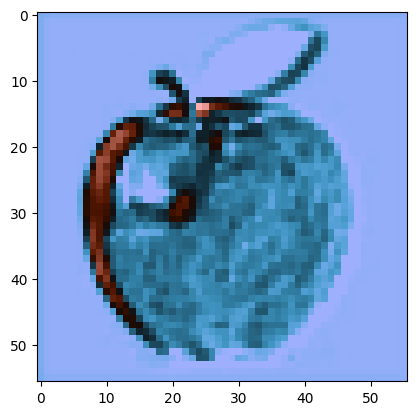

In [91]:
plt.imshow(y[0,:,:,20], cmap='berlin')